# Group ID 16 : Crime Analysis and Visualization in India
---
## Team Members :
 * Shreeya Thigale (33168)
 * Rucha Shinde (33162)
 * Riddhi Toshniwal (33169)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Data Importing

In [2]:
df = pd.read_csv('C:/Users/ABC/Desktop/Crime/MCI_2014_to_2019.csv',sep=',') 
df['Total'] = 1
df.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId,Total
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001,1
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002,1
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003,1
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004,1
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005,1


### Data Visualisation
---
#### Plotting bargraph for Major Crime Indicators

MCI
Assault            111423
Auto Theft          23380
Break and Enter     43302
Robbery             21543
Theft Over           6787
dtype: int64


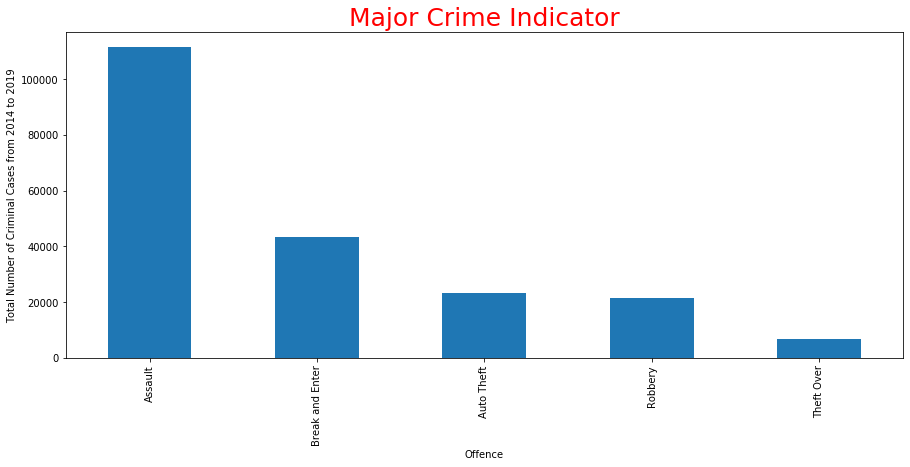

In [3]:
major_crime_indicator = df.groupby('MCI',as_index=False).size()
print(major_crime_indicator)

plt.subplots(figsize = (15, 6))
ct = major_crime_indicator.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Offence')
ax.set_ylabel('Total Number of Criminal Cases from 2014 to 2019')
ax.set_title('Major Crime Indicator',color = 'red',fontsize=25)
plt.show()

#### Plotting Line Chart for Total Criminal Cases from 2014 to 2019

occurrenceyear
2014.0    31638
2015.0    32316
2016.0    32809
2017.0    34561
2018.0    36323
2019.0    37674
dtype: int64


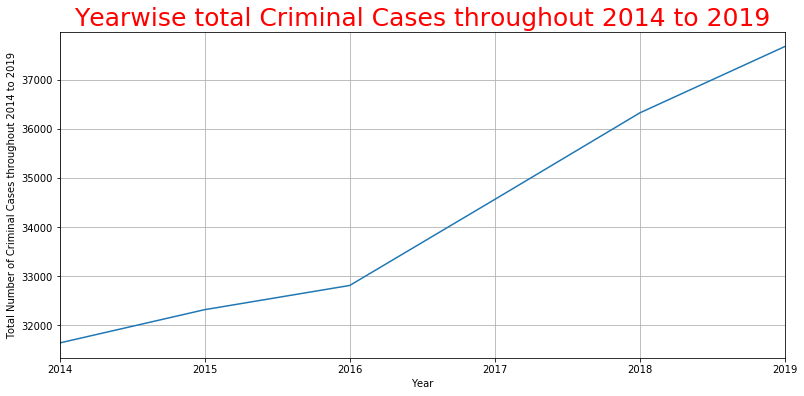

In [4]:
# Creating a Countplot
df2 = df[df['occurrenceyear'] > 2013]
yearwise_total_crime = df2.groupby('occurrenceyear').size()
print(yearwise_total_crime)

plt.figure(figsize=(13,6))
ct = yearwise_total_crime.sort_values(ascending=True)
ax = ct.plot.line()
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of Criminal Cases throughout 2014 to 2019')
ax.set_title('Yearwise total Criminal Cases throughout 2014 to 2019',color = 'red',fontsize=25)
ax.grid(linestyle='-')
plt.show()

#### Plotting Pie chart for crime according to premisetype

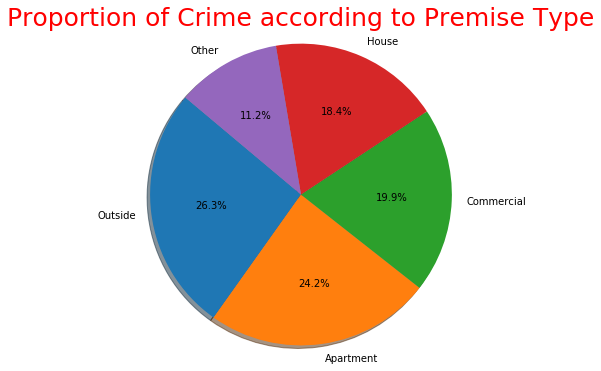

In [5]:
# Proportion of crime according to premisetype
premise_type = df.groupby('premisetype').size()
premise_type.head()
labels = ['Outside','Apartment','Commercial','House','Other']
count = [54253,49996,41081,37927,23178]
explode = (0, 0, 0, 0, 0) 

fig, ax = plt.subplots(figsize = (6,6))
ax.pie(count, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Crime according to Premise Type", color='red', fontsize=25)
plt.show()

#### Plotting Bar graph for assault crimes in toronto

offence
Administering Noxious Thing         296
Aggravated Aslt Peace Officer        12
Aggravated Assault                 1864
Aggravated Assault Avails Pros       13
Air Gun Or Pistol: Bodily Harm       20
Assault                           76124
Assault - Force/Thrt/Impede         257
Assault - Resist/ Prevent Seiz     2376
Assault Bodily Harm                5104
Assault Peace Officer              3581
Assault Peace Officer Wpn/Cbh       319
Assault With Weapon               18168
Crim Negligence Bodily Harm          82
Disarming Peace/Public Officer       72
Discharge Firearm - Recklessly      896
Discharge Firearm With Intent      1369
Pointing A Firearm                  737
Set/Place Trap/Intend Death/Bh        1
Traps Likely Cause Bodily Harm        1
Unlawfully Causing Bodily Harm       13
Use Firearm / Immit Commit Off      118
dtype: int64


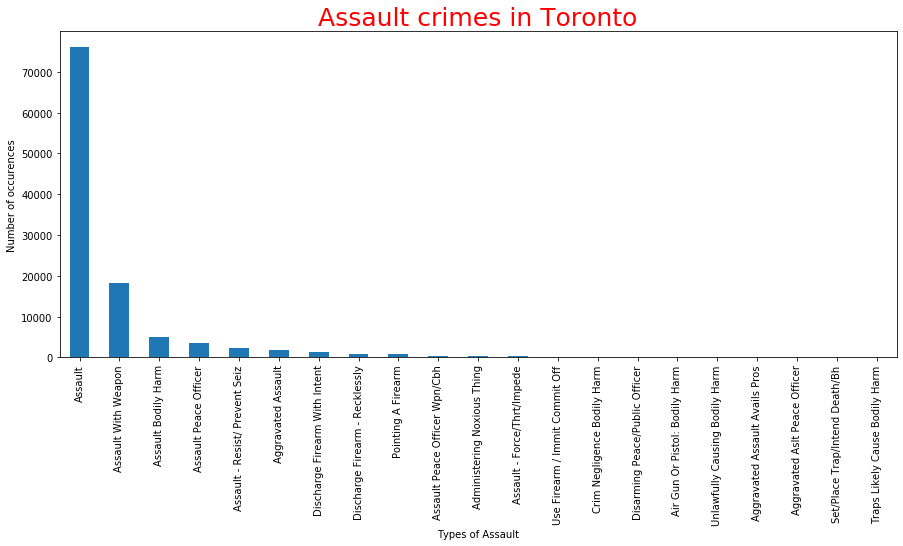

In [6]:
assault = df[df['MCI'] == 'Assault']
assault_types = assault.groupby('offence',as_index=False).size()
print(assault_types)

plt.subplots(figsize = (15, 6))
ct = assault_types.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Types of Assault')
ax.set_ylabel('Number of occurences')
ax.set_title('Assault crimes in Toronto',color = 'red',fontsize=25)
plt.show()

#### Plotting line graph for crime types by hour of day

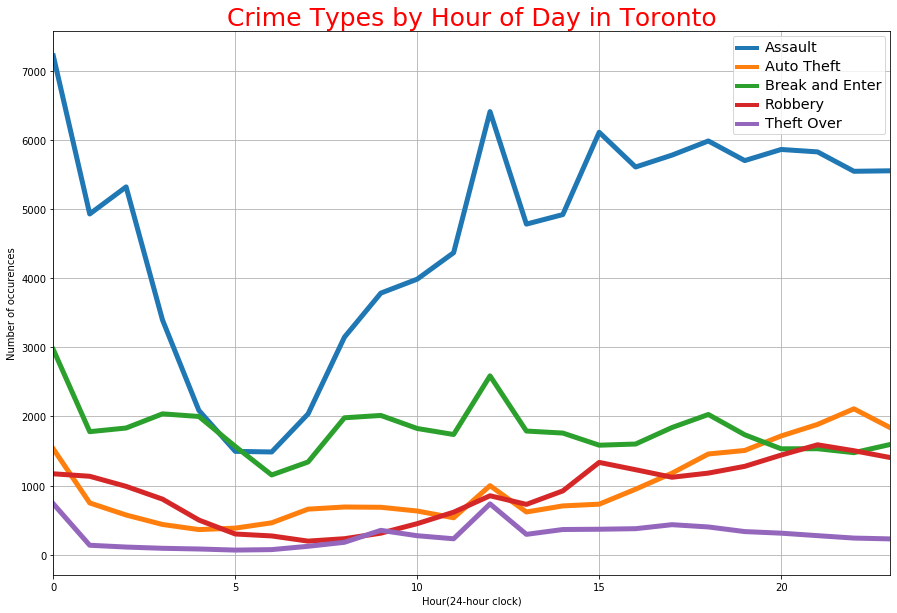

In [7]:
hour_crime_group = df.groupby(['occurrencehour','MCI'],as_index=False).agg({'Total':'sum'})
#print(hour_crime_group)

fig, ax = plt.subplots(figsize=(15,10))
hour_crime_group.groupby('MCI').plot(x="occurrencehour", y="Total", ax=ax,linewidth=5)
ax.set_xlabel('Hour(24-hour clock)')
ax.set_ylabel('Number of occurences')
ax.set_title('Crime Types by Hour of Day in Toronto',color = 'red',fontsize=25)
ax.grid(linestyle='-')
leg = plt.legend([v[0] for v in hour_crime_group.groupby('MCI')['MCI']])
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

#### Plotting bar graph for Neighbourhoods with most crimes Top 20

Neighbourhood
Waterfront Communities-The Island (77)      7747
Bay Street Corridor (76)                    6817
Church-Yonge Corridor (75)                  6232
West Humber-Clairville (1)                  5702
Moss Park (73)                              4786
York University Heights (27)                3989
Downsview-Roding-CFB (26)                   3974
Kensington-Chinatown (78)                   3823
Woburn (137)                                3798
West Hill (136)                             3497
Islington-City Centre West (14)             3287
Annex (95)                                  2917
Glenfield-Jane Heights (25)                 2776
South Riverdale (70)                        2726
Clairlea-Birchmount (120)                   2711
Dovercourt-Wallace Emerson-Junction (93)    2639
Malvern (132)                               2624
Mount Olive-Silverstone-Jamestown (2)       2591
Mimico (includes Humber Bay Shores) (17)    2568
Bendale (127)                               2552
dtype:

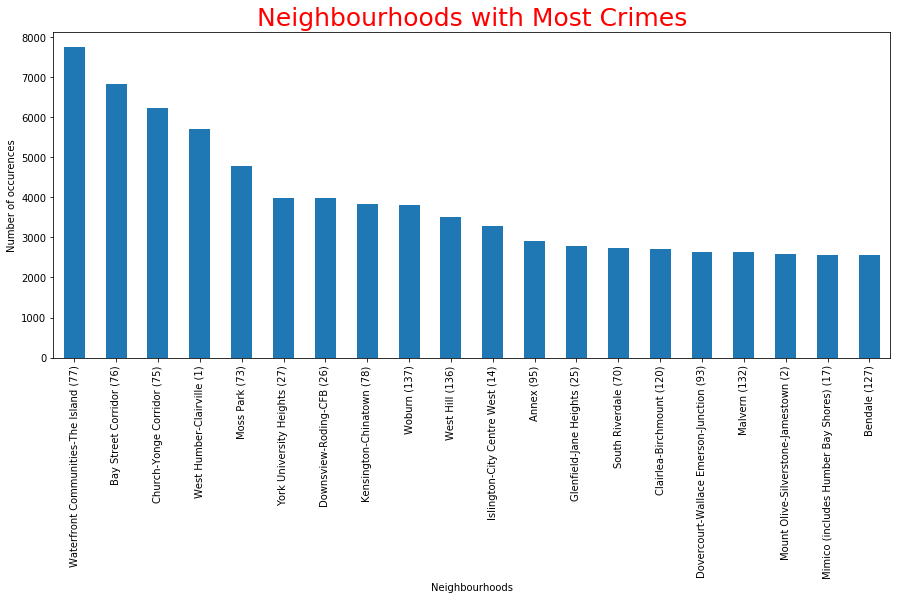

In [8]:
location_group = df.groupby('Neighbourhood',as_index=False).size().sort_values(ascending = False).head(20)
print(location_group)

plt.subplots(figsize = (15, 6))
ct = location_group.sort_values(ascending = False)
ax = ct.plot.bar()
ax.set_xlabel('Neighbourhoods')
ax.set_ylabel('Number of occurences')
ax.set_title('Neighbourhoods with Most Crimes',color = 'red',fontsize=25)
plt.show()

#### Plotting Heatmap for Major Crime indicator by Month

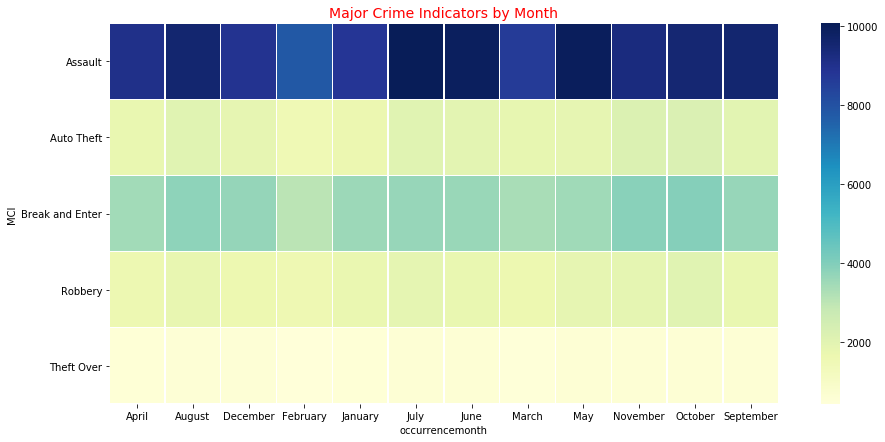

In [9]:
# Plot a heatmap
mci_monthwise = df.groupby(['occurrencemonth','MCI'],as_index=False).agg({'Total':'sum'})

plt.figure(figsize=(15, 7))
crime_count = mci_monthwise.pivot("MCI","occurrencemonth","Total" )

plt.yticks(rotation=1)
ax = sns.heatmap(crime_count,cmap="YlGnBu", linewidths=.5)
plt.title("Major Crime Indicators by Month",color = 'red',fontsize=14)
plt.show()

#### Plotting choropleth map for Crime in Toronto

In [10]:
np = 'C:/Users/ABC/Desktop/Crime/Maps/Neighbourhoods.shp'
regions = gpd.read_file(np)
#regions.head()

crime_by_neighbourhood = df.groupby('Neighbourhood',as_index=False).agg({'Total':'sum'})
merged = regions.set_index('FIELD_7').join(crime_by_neighbourhood.set_index('Neighbourhood'))
merged.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry,Total
FIELD_7,,,,,,,,,,,,,,,,
Wychwood (94),4621,25886861,25926662,49885,94,94,Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680...",801
Yonge-Eglinton (100),4622,25886820,25926663,49885,100,100,Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704...",823
Yonge-St.Clair (97),4623,25886834,25926664,49885,97,97,Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680...",412
York University Heights (27),4624,25886593,25926665,49885,27,27,York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759...",3989
Yorkdale-Glen Park (31),4625,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705...",1998


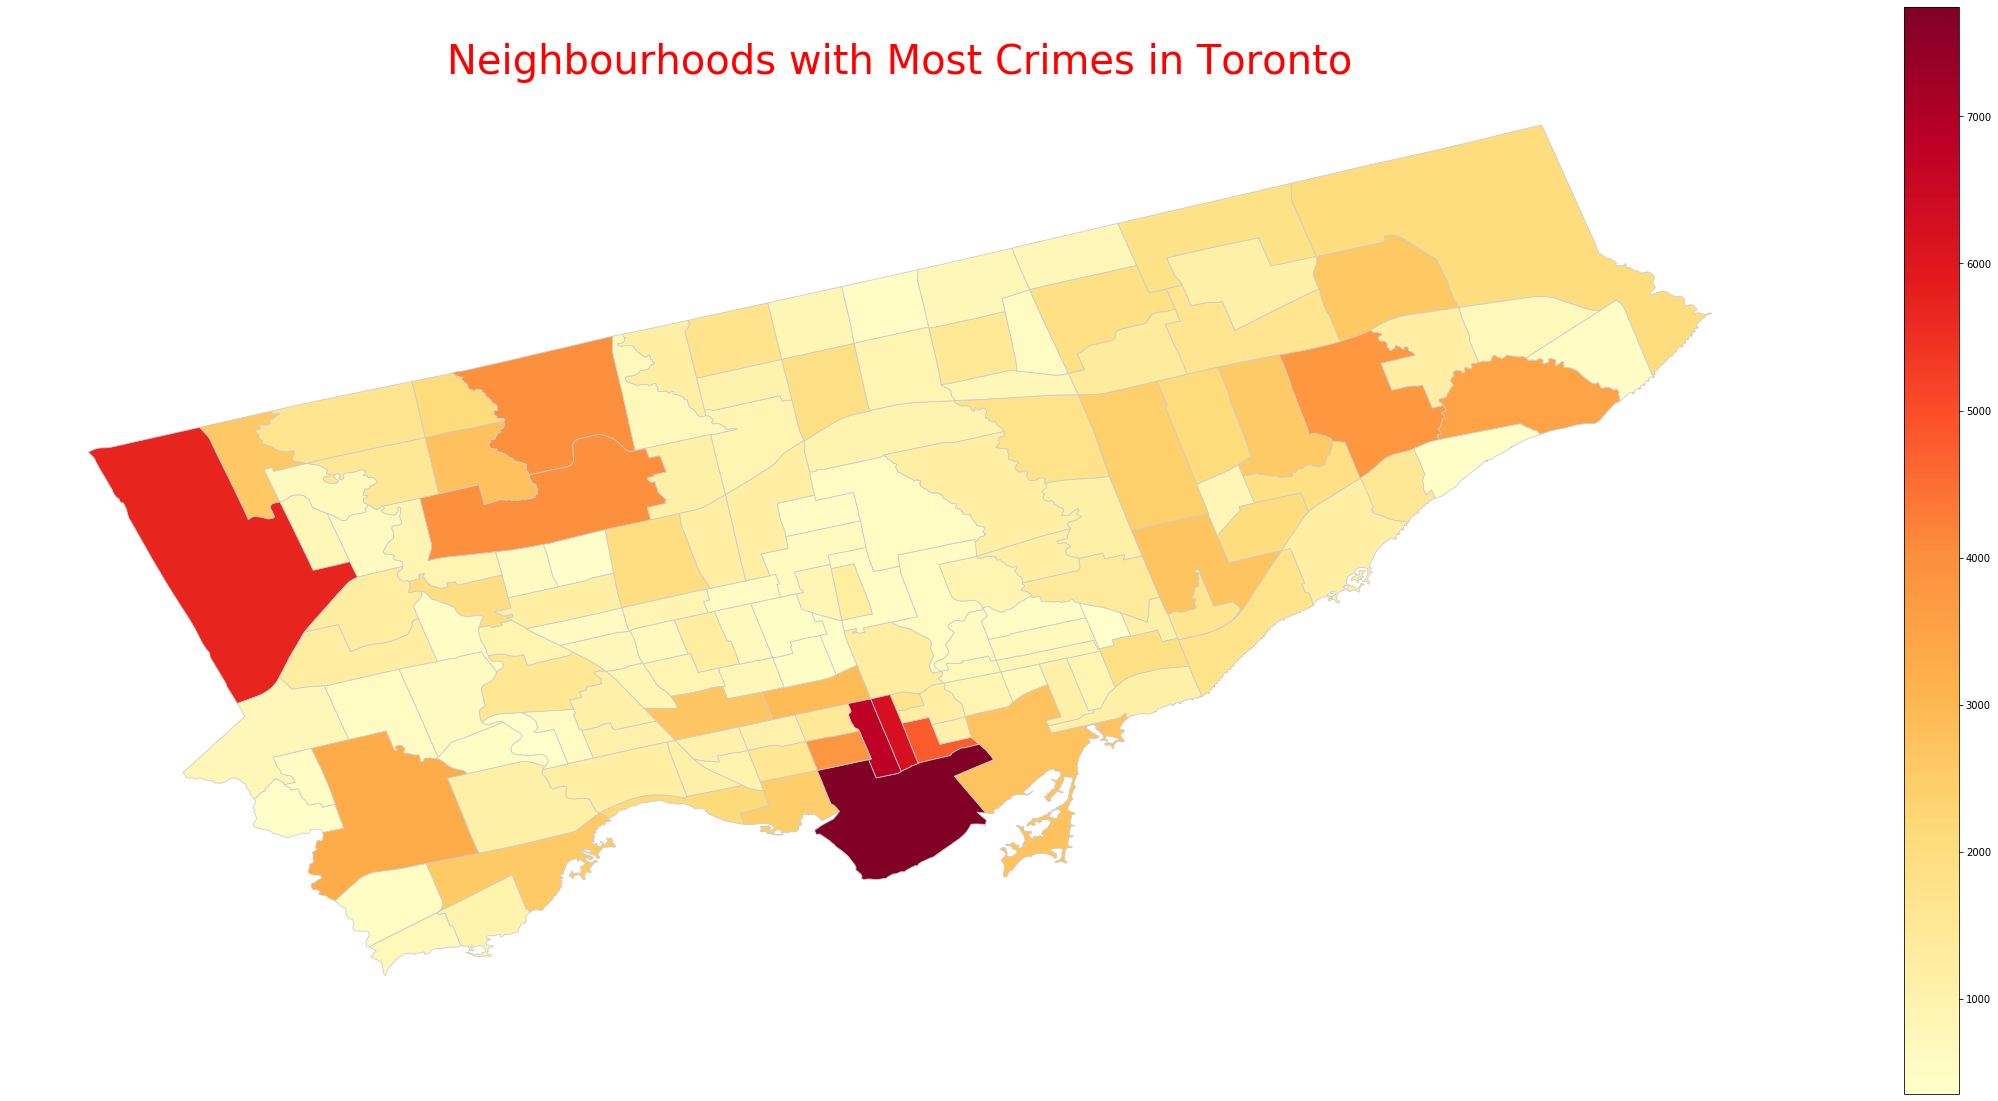

In [11]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Neighbourhoods with Most Crimes in Toronto', fontsize=40, color='red')
merged.plot(column='Total', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

### Data Preprocessing

In [12]:
# Columns for the models
col_list = ['occurrenceyear',	'occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','MCI',	'Division',	'Hood_ID','premisetype']

# New dataframe from columns
df2 = df[col_list]
df2 = df2[df2['occurrenceyear'] > 2013]

#Factorize dependent variable column:
crime_var = pd.factorize(df2['MCI'])
df2['MCI'] = crime_var[0]
definition_list_MCI = crime_var[1]

#factorize independent variables:
premise_var = pd.factorize(df2['premisetype'])
df2['premisetype'] = premise_var[0]
definition_list_premise = premise_var[1] 

#factorize occurenceyear:
year_var = pd.factorize(df2['occurrenceyear'])
df2['occurrenceyear'] = year_var[0]
definition_list_year = year_var[1] 

#factorize occurencemonth:
month_var = pd.factorize(df2['occurrencemonth'])
df2['occurrencemonth'] = month_var[0]
definition_list_month = month_var[1] 

#factorize occurenceday:
day_var = pd.factorize(df2['occurrenceday'])
df2['occurenceday'] = day_var[0]
definition_list_day = day_var[1] 

#factorize occurencedayofweek:
dayweek_var = pd.factorize(df2['occurrencedayofweek'])
df2['occurrencedayofweek'] = dayweek_var[0]
definition_list_day = dayweek_var[1] 

#factorize division:
division_var = pd.factorize(df2['Division'])
df2['Division'] = division_var[0]
definition_list_division = division_var[1] 

#factorize HOOD_ID:
hood_var = pd.factorize(df2['Hood_ID'])
df2['Hood_ID'] = hood_var[0]
definition_list_hood = hood_var[1] 

#factorize occurencehour:
hour_var = pd.factorize(df2['occurrencehour'])
df2['occurrencehour'] = hour_var[0]
definition_list_hour = hour_var[1] 

#factorize occurencedayofyear:
dayyear_var = pd.factorize(df2['occurrencedayofyear'])
df2['occurrencedayofyear'] = dayyear_var[0]
definition_list_dayyear = dayyear_var[1] 

#### Splitting the dataset into training and tests set

In [17]:
#set X and Y:
X = df2.drop(['MCI'],axis=1).values
y = df2['MCI'].values

#split the data into train and test sets for numeric encoded dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

#need to OneHotEncode all the X variables for input into the classification model:
binary_encoder = OneHotEncoder(sparse=False,categories='auto')
encoded_X = binary_encoder.fit_transform(X)
X_train_OH, X_test_OH, y_train_OH, y_test_OH = train_test_split(encoded_X, y, test_size = 0.25, random_state = 21)

## Crime Predictions
---
### Predicting the type of major crime committed based on time of day, neighbourhood, division, year, month, etc.
#### Classification Analysis
When the true goal of data analysis is to be able to predict which of several non-overlapping groups an observation belongs to, the techniques we use are known as classification techniques.It is a Data analysis task, i.e. the process of finding a model that describes and distinguishes data classes and concepts. Classification is the problem of identifying to which of a set of categories (subpopulations), a new observation belongs to, on the basis of a training set of data containing observations and whose categories membership is known.


---
#### Data Preprocessing

In [14]:
# Numeric Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Accuracy of Random Forest : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, target_names=definition_list_MCI)) 

Accuracy of Random Forest :  0.6352691356100602
[[23861  2290   662    65   863]
 [ 5261  5034    67    66   272]
 [ 2991   288  1731    11   339]
 [ 1119   337    46    29   148]
 [ 2853   750   263    31  1954]]
                 precision    recall  f1-score   support

        Assault       0.66      0.86      0.75     27741
Break and Enter       0.58      0.47      0.52     10700
        Robbery       0.63      0.32      0.43      5360
     Theft Over       0.14      0.02      0.03      1679
     Auto Theft       0.55      0.33      0.41      5851

       accuracy                           0.64     51331
      macro avg       0.51      0.40      0.43     51331
   weighted avg       0.61      0.64      0.60     51331



In [15]:
#One Hot Encoded Model
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train_OH, y_train_OH)
y_pred_OH = classifier.predict(X_test_OH)

print("Accuracy of Random Forest with OneHotEncoder : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test_OH, y_pred_OH)) 
print(classification_report(y_test_OH,y_pred_OH, target_names=definition_list_MCI))

Accuracy of Random Forest with OneHotEncoder :  0.6352691356100602
[[24536  1948   499    28   730]
 [ 5223  5157    33    54   233]
 [ 3107   253  1673     6   321]
 [ 1168   319    25    24   143]
 [ 3012   621   176    17  2025]]
                 precision    recall  f1-score   support

        Assault       0.66      0.88      0.76     27741
Break and Enter       0.62      0.48      0.54     10700
        Robbery       0.70      0.31      0.43      5360
     Theft Over       0.19      0.01      0.03      1679
     Auto Theft       0.59      0.35      0.44      5851

       accuracy                           0.65     51331
      macro avg       0.55      0.41      0.44     51331
   weighted avg       0.63      0.65      0.62     51331



In [16]:
#Balanced Class Weight doesn't make a big difference for results:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42, class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

print("Accuracy of Random Forest with Balanced class weight: ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test,y_pred, target_names=definition_list_MCI))

Accuracy of Random Forest with Balanced class weight:  0.6341392141201223
[[24005  2260   649    66   761]
 [ 5431  4869    66    68   266]
 [ 2989   281  1774    12   304]
 [ 1147   332    38    29   133]
 [ 2984   729   235    29  1874]]
                 precision    recall  f1-score   support

        Assault       0.66      0.87      0.75     27741
Break and Enter       0.57      0.46      0.51     10700
        Robbery       0.64      0.33      0.44      5360
     Theft Over       0.14      0.02      0.03      1679
     Auto Theft       0.56      0.32      0.41      5851

       accuracy                           0.63     51331
      macro avg       0.52      0.40      0.43     51331
   weighted avg       0.61      0.63      0.60     51331



#### Random Forest Classifier with One hot Encoder shows modest improvement in accuracy with F1-score of 0.65
---
### Conclusion :

A multi-class classification model using a Random Forest classifier is built to predict the type of major crime committed based on time of day, neighbourhood, division, year, month, etc. The dataset includes every major crime committed from 2014-2019* in the city of Toronto, with detailed information about the location and time of offence. The data contains only categorical variables so the modeling process tests both numeric encoding and OneHot encoding, with some improvement with the latter approach.
The model performs reasonably well on F1-score (precision and recall) for a five-class classification problem. Though the data set is somewhat unbalanced towards assaults (higher volume), balancing class weights does not materially impact model performance.